# Assignment 4

# Part I: K-means Segmentation

NOTE: Three of the theoretical problems below are optional for undergrads. Note that the "theoretical" problems are independent of the programming part (problem 4).

## Problem 0 (<i>probability simplex</i> and distribution <i>entropy</i>)
### The general concept of "entropy" is very important in science (statistics, physics, computer vision, ML, AI, information threory, data analysis, etc). The general formula for the entropy is $$H({\mathbf S}) = -\sum_k S^k \ln S^k$$ where $${\mathbf S}:= (S^1,...,S^K)\;\;\in \;\;\Delta^K $$ is any distribution over $K$ values (e.g. classes, categories, decisions, etc) and $\Delta^K:= \{p\in{\cal R}^K\;|p^k\geq 0,\;\sum_{k=1}^K p^k=1\}\subset {\cal R}^K$ is a so-called <i>probability simplex</i>. Probably the most basic property of entropy one should know is that it measures "randomness" of a distribution. 

### (part a) 
### In this exercise you should visualize the entropy function $H: \Delta^K \rightarrow {\cal R}^1$ for $K=2$. In this simple case the distribution ${\mathbf S} = (S^1,S^2)$ may correspond to some binary random variable $X$ so that $S^1=Pr(X=1)$ and  $S^2=Pr(X=0)$. For example, $X$ could represent a binary decision about the category of an object observed in an image (person or not-a-person). Since $S^1+S^2=1$, probability simplex $\Delta^2$ has only one degree of freedom - one scalar is enough to represent an arbitrary binary distribution. It is easy to visualize the entropy function over all possible binary distributions ${\mathbf S}=(S^1,S^2)\in\Delta^2 $ as probability simplex  $\Delta^2 = \{(x,1-x)\,|\, 0\leq x\leq 1\}$  is a  line interval inside ${\cal R}^2$. <img src="images/simplex2.png" width="300" height="300"> Visualize the entropy function $H({\mathbf S})$ for $K=2$ as follows. Derive the expression for function $H(x):=H({\mathbf S})$ for ${\mathbf S}=(x,1-x)$ and use $matplotlib$ to plot  $H(x)$ for $x\in[0,1]$ in the code cell below. State which binary distribution(s) ${\mathbf S}=(S^1,S^2)$  have the lowest and the largest entropy values. Informally relate your observations to "randomness" of these distributions. 

### Solution: $$H(x) = ...$$

In [1]:
# Write code generating 2D plot of the entropy H(x) for x in [0,1]
# HINT: you might need to be carefull with potential numerical issues at x=0 and x=1, 
# but often it works fine without doing anything special.
%matplotlib notebook


### The lowest entropy value is ... and it corresponds to... (what distribution(s))
### The largest entropy value is ...and it corresponds to ... (what distribution(s))

### (part b) 

### In the previous part you saw a visulaization of the probability simplex $\Delta^2$ as a subset of ${\cal R}^2$. Using any picture editor (e.g. "paint"), edit file $images/simplex3.png$ (shown below) to draw your best impression of the probability simplex $\Delta^3 \subset {\cal R}^3$  for distributions ${\mathbf S}=(S^1,S^2,S^3)$ over $K=3$ possible values/classes/categories. Your drawing should visualize simplex $\Delta^3$ as a subset of ${\cal R}^3$. <img src="images/simplex3.png" width="500" height="500"> 

In [2]:
# BONUS: one can also visualize the entropy function over the probability simplex for K=3. 
# NOTE: There are a number of different ways to do this visualizatin, but it is a bit trickier than what you did in part (a). 
#       Do this bonus excercise only if you have time. 

## Problem 1 (soft-max)
### Following the material on slide 55 in topic 9A, derive the optimal "soft" clustering (distribution over clusters) at point $p$ $${\mathbf S}_p=\{S_p^k\;|\;1\leq k\leq K,\; S_p^k\geq 0,\; \sum_k S_p^k=1\}$$ that Lloyd's algorithm would obtain when re-estimating segmentation for fixed cluster models parameters $\mu_k$.  Note that the total K-means objective $E({\mathbf S},\mu)$ as a function of segmentation $\mathbf S$ (when $\mu$ is fixed) is a sum of independent terms for every pixel. When computing optimal distribution ${\mathbf S}_p$ it is enough to focus on the terms dependent only on its components $S_p^k$. For the soft or fuzzy K-means formulation on slide 55, these terms are $$-\sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p) \quad\quad\quad\quad\quad\quad (*)$$ where constant $a_p^k := \log P(f_p|\mu_k)$  (assuming fixed  $\mu$) corresponds to $k$-th cluster's log-likelihood at the observed feature point $f_p$, constant $T$ represents a so-called "temperature" parameter, and $H({\mathbf S}_p):=-\sum_k S_p^k \log S_p^k$ is the entropy of ${\mathbf S}_p$. 
### Use your solution to show what happens with the optimal distribution $S_p$ when the temperature parameter reduces to zero $T\longrightarrow 0$.
### HINT 1: Optimization of $(*)$ should be done over variable ${\mathbf S}_p$ representing a probability distribution. Thus, constraint $\sum_k S_p^k=1$ should be respected.  You should use the standard general <a href="https://en.wikipedia.org/wiki/Lagrange_multiplier#:~:text=In%20mathematical%20optimization%2C%20the%20method,chosen%20values%20of%20the%20variables).">Lagrangian approach</a> that converts constrained optimization into unconstrained one. In particular, you can combine objective function $(*)$ with the constraint $\sum_k S_p^k=1$ into the <i>Lagrangian</i>: $$L({\mathbf S}_p,\lambda) \;=\; -\sum_{k=1}^K S_p^k a_p^k \;-\; T\;H({\mathbf S}_p)\; +\;\lambda \left(\sum_{k=1}^K S_p^k - 1\right) \quad\quad\quad\quad (**)$$ that includes one extra optimization variable $\lambda$, the so called <i>Lagrange multiplier</i>.  The solution ${\mathbf S}_p$  for the original constrained optimization problem follows directly from the solution $\{{\mathbf S}_p, \lambda \}$ that minimizes the Lagrangian.
### HINT 2: Similarly to optimization of single-variate functions, you can find extrema points for the multi-variate Lagrangian $(**)$ by finding values of variables $(S_p^1,\dots,S_p^K,\lambda)$ where its derivative (gradient) equals zero.  That is, the whole problem boils down to solving the system of $K+1$ equations $\nabla L = {\mathbf 0}$ for the Lagrangian in $(**)$.
### HINT 3: The  goal of this excercise is to see how adding the entropy affects a linear loss. Optimization of $(*)$ over distributions ${\mathbf S}_p$ should result in the, so-called, <font color="red">soft-max operator</font> applicable to arbitrary $K$ potentials $\{a_p^k\,|\,1\leq k\leq K\}$.

## Problem 2 (Mahalanobis distance, decorrelation, etc.) - required for grad students, optional for undergrads (BONUS)
### Let $X\in R^N$ be a Gaussian random vector with given mean $\mu$ and covariance matrix $\Sigma$. Find $N\times N$ matrix $A$ such that linear transformation $Y=AX$ gives a random vector $Y$ with covariance $\Sigma_Y={\mathbf I}$. That is, the components of the transformed  random vector $Y$ should be i.i.d. You should derive an equation for matrix $A$ assuming as given eigen-decomposition of the covariance matrix $\Sigma=U\Lambda U^T$ where $Λ=diag(s_1,…,s_n)$ is a diagonal matrix of (non-negative!) eigen-values and $U$ is an orthogonal $N\times N$ matrix (its columns are unit eigen-vectors of $\Sigma$).
### HINT: you should solve the following (equivalent) simple geometric problem on "linear warps" (linear domain transforms): find a linear transformation $A$ of points in $R^N$ such that Mahalanobis distances (slide 59, topic 9A) between any two given vectors $X,\mu\in R^N$ are equivalent to Euclidean distances between the corresponding vectors $Y=AX$ and $m=A\mu$ in the transformed space, that is, $$\|X-\mu\|^2_\Sigma \;\;=\;\; \|Y-m\|^2.$$  The proof should be simple (just a couple of lines) if you use linear algebraic expressions for two squared metrics above and the given eigen decomposition of matrix $\Sigma$.
### INTERPRETATION 1: reading the geometric result in revese shows that linear transformation "distort" Euclidean distances into Mahalanobis distances.
### INTERPRETATION 2 (Euclidean embedding): a space with Mahalanobis metric can be isometrically embedded in a Euclidean space. This is a trivial spacial case of the <font color="red">Nash theorem</font> on existence of Euclidean embeddings of more general (Riemannian) metric spaces.

## Problem 3
### Show algebraic equivalence between two non-parametric formulations for K-means (objectives $E(S)$ at the bottom of slide 74, Topic 9A):
### $$  \sum_{k=1}^K \frac{\sum_{pq\in S^k}\|f_p-f_q\|^2}{2\;|S^k|} \;\;=\;\; const - \sum_{k=1}^K \frac{\sum_{pq\in S^k} \langle f_p,f_q\rangle}{|S^k|}$$
#### Note: here the summation over $pq\in S^k$ is an abbreviated notation for double summation over all $p\in S^k$ and all $q\in S^k$.

Solution:

## Problem 4 - (a simple finite-dimensional version of Mercer theorem) - required for grad students, optional for undergrads (BONUS)
### Let $A$ be an $n\times n$ positive semi-definite matrix defining pairwise affinities between $n$ ponts. Find a closed-form expression for $n$ vectors $\phi_i$  (a so-called "Euclidean embedding") such that their Euclidean dot products agree with the given affinites, i.e. $\langle \phi_i,\phi_j\rangle = A_{ij}$ for all $1\leq i,j\leq n$. You can assume known eigen-decomposition $A=Q\Lambda Q^T$ where $Λ=diag(λ_1,…,λ_n)$ is a diagonal matrix of (non-negative!) eigen-values and $Q$ is an orthogonal $n\times n$ matrix whose columns $Q_i$ are unit eigen-vectors of $A$.

Solution:

## Problem 5 - (approximate low-dimenstional Euclidean embedding) - required for grad students, optional for undergrads (BONUS)
### Assume that $\tilde{A}$ is a low-rank approximation of matrix $A$ in problem 4 of given rank $m<n$. That is, $\tilde{A} = Q\Lambda_m Q^T$ where $\Lambda_m=diag(\lambda_1,\dots,\lambda_m,0,\dots,0)$ is a diagonal matrix of the largest $m$ eigen values of $A$ (a la Eckart–Young–Mirsky theorem, Topic 8). Using your solution for problem 4, specify a formula for "Euclidean embedding" $\{\tilde{\phi}_i\}$ such that $\langle \tilde{\phi}_i,\tilde{\phi}_j\rangle = \tilde{A}_{ij}$ and show that  $\tilde{\phi}_i \in {\cal R}^m$.
#### Comment: basic K-means (Lloyd's algorithm) over such points $\{\tilde{\phi}_i\}$ can be used as an approximate algorithm for kernel clusterng (e.g. for average association criteria). This approach is an example of "spectral clustering", which uses eigen decomposition of the affinity matrix $A$.

Solution: 

## Problem 4 (K-means). 
### Subproblem 4.1 
### Implement K-means (Lloyd's algorithm) for clustering pixel features. Most of the work is already done for you, but you do get a chance to play with numpy and to evaluate empirical properties of K-means. Note that your implementation will be slow if you use double-loops to traverse the pixels. There will be deductions for such double-loops. You should learn how to use functions like $np.where$, $np.minimum$, $np.square$, $np.ogrid$ or others similar general functions that alow to avoid multi-loops over matrix (image) elements (pixels).
#### The provided code below only computes random pixel segments. You need to write code producing correct clusters and correct "means". To achive this you only need to complete implementation of functions $compute\_means$ and $compute\_labels$ inside "MyKmenasApp" corresponding to the two iterative steps in Lloyd's algorithm (as in "compute_k_means_clusters"). 
#### Your implementation of the main two steps of K-means algorithm should use RGBXY features. Relative contribution of "squared errors" from XY features must be set by parameter "weightXY" (or self.w inside MyKmeansApp), so that the squared error between RGBXY feture $F_p=[R_p,G_p,B_p,X_p,Y_p]$ at any pixel $p$ and any given cluster mean $m=[R_m,G_m,B_m,X_m,Y_m]$ is 
#### $$||F_p - m||^2 = (R_p - R_m)^2 + (G_p - G_m)^2 + (B_p - B_m)^2 + w \cdot (X_p-X_m)^2 + w \cdot (Y_p-Y_m)^2.$$
#### Fully implemented "KmeansPresenter" visulaizes the segmentation results (cluster labels mask) where each cluster is highlighted either by some  random color (press r-key) or by the "mean" segment color (press m-key). All keys that "KmeansPresenter" responds to are as follows: 

1. press 'i'-key for each (i)teration of K-means 
2. press 'c'-key to run K-means to (c)onvergence (when energy improvement is less than given threshold)
3. press 'v'-key to run K-means to convergence with (v)isualization of each iteration
4. press 'r'-key to start over from (r)andom means
5. press 's'-key to change to a random (s)olid color-palette for displaying clusters
6. press 't'-key to change to a random (t)ransparent palette for displaying clusters
7. press 'm'-key to change to the (m)ean-color palette for displaying clusters

In [3]:
%matplotlib notebook
# loading standard modules
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2gray

# loading custom module (requires file asg1.py in the same directory as the notebook file)
from asg1_error_handling import Figure, KmeansPresenter

In [4]:
class MyKmeansApp:

    def __init__(self, img, num_clusters=2, weightXY=1.0):
        self.k = num_clusters
        self.w = weightXY
        self.iteration = 0   # iteration counter
        self.energy = np.infty  # energy - "sum of squared errors" (SSE)

        num_rows = self.num_rows = img.shape[0]
        num_cols = self.num_cols = img.shape[1]

        self.im = img
        
        self.means = np.zeros((self.k,5),'d') # creates a zero-valued (double) matrix of size Kx5
        self.init_means()
      
        self.no_label = num_clusters  # special label value indicating pixels not in any cluster (e.g. not yet) 

        # mask "labels" where pixels of each "region" will have a unique index-label (like 0,1,2,3,..,K-1)
        # the default mask value is "no-label" (K) implying pixels that do not belong to any region (yet)
        self.labels = np.full((num_rows, num_cols), fill_value=self.no_label, dtype=np.int)
        
        self.fig = Figure()
        self.pres = KmeansPresenter(img, self)
        self.pres.connect_figure(self.fig)
       
    def run(self):
        self.fig.show()
        
    def init_means(self):      
        self.iteration = 0           # resets iteration counter 
        self.energy = np.infty       # and the energy

        poolX = range(self.num_cols)
        poolY = range(self.num_rows)
        
        # generate K random pixels (Kx2 array with X,Y coordinates in each row)
        random_pixels = np.array([np.random.choice(poolX,self.k),np.random.choice(poolY,self.k)]).T
        
        for label in range(self.k):
            self.means[label,:3] = self.im[random_pixels[label,1],random_pixels[label,0],:3]
            self.means[label,3] = random_pixels[label,0]
            self.means[label,4] = random_pixels[label,1]
    
    # This function compute average values for R, G, B, X, Y channel (feature component) at pixels in each cluster
    # represented by labels in given mask "self.labels" storing indeces in range [0,K). The averages should be
    # saved in (Kx5) matrix "self.means". The return value should be the number of non-empty clusters. 
    def compute_means(self):
        labels = self.labels # Initializing variable to hold the labels
        non_empty_clusters = 0 # Initialize variable to hold the number of non-empty clusters
        
        # Your code below should compute average values for R,G,B,X,Y features in each segment 
        # and save them in (Kx5) matrix "self.means". For empty clusters set the corresponding mean values 
        # to infinity (np.infty). Report the correct number of non-empty clusters by the return value.
        
        # Iterate over each cluster
        for i in range(self.k):
            # Get the mask for the current cluster
            cluster_mask = (labels == i)
            
            # Check if the cluster is non-empty
            if np.any(cluster_mask):
                non_empty_clusters += 1 # Increment non-empty cluster count
                
                # Get the pixel indices for the current cluster
                cluster_indices = np.where(cluster_mask)
                
                # Compute the mean color for the cluster
                mean_color = self.im[cluster_indices].mean(axis = 0)
                
                # Compute the mean X and Y positions for the cluster
                mean_position = np.mean(np.stack(cluster_indices, axis = 1), axis = 0)
                
                # Update the cluster mean in the means array
                self.means[i, :3] = mean_color
                self.means[i, :3] = mean_position * self.w
            else:
                # set the mean to infinity if the cluster is empty
                self.means[i] = np.infty
            
        
        return non_empty_clusters
            
    # The segmentation mask is used by KmeanPresenter to paint segments in distinct colors
    # NOTE: valid region labels are in [0,K), but the color map in KmeansPresenter
    #       accepts labels in range [0,K] where pixels with no_label=K are not painted/colored.
    def get_region_mask(self):  
        return self.labels  
    
    # This function computes optimal (cluster) index/label in range 0,1,...,K-1 for pixel x,y based on 
    # given current cluster means (self.means). The functions should save these labels in "self.labels".
    # The return value should be the corresponding optimal SSE.
    def compute_labels(self):
        shape = (self.num_rows,self.num_cols)
        opt_labels = np.full(shape, fill_value=self.no_label, dtype=np.int) # HINT: you can use this array to store and update
                                                                            # currently the best label for each pixel.
        
        min_dist = np.full(shape, fill_value=np.inf)  # HINT: you can use this array to store and update 
                                                      # the (squared) distance from each pixel to its current "opt_label".
                                                      # use 'self.w' as a relative weight of sq. errors for X and Y components
        
        # Replace the code below by your code that computes "opt_labels" array of labels in range [0,K) where 
        # each pixel's label is an index 'i' such that self.mean[i] is the closest to R,G,B,X,Y values of this pixel.
        # Your code should also update min_dist so that it contains the optmail squared errors  
        # opt_labels = np.random.choice(range(self.k),shape)
        # min_dist = np.random.choice(range(100),shape)
        
        # Create a grid of (x,y) coordinates
        x, y = np.meshgrid(np.arange(shape[1]), np.arrange(shape[0]))
        
        # Stack the grid with the image to create an array of RGBXY for each pixel
        features = np.dstack((self.im, x * self.w, y * self.w))
        
        # Compute the squared distance between each pixel and each cluster mean
        for i in range(self.k):
            # Compute the squared distance
            distance = np.linalg.norm(features - self.means[i], axis = 2)**2
            
            # Update the labels and minimum distance where the new distance is smaller
            mask = distance < min_dist
            opt_labels[mask] = i
            min_dist[mask]
 
        # update the labels based on opt_labels computed above
        self.labels = opt_labels
        
        # returns the optimal SSE (corresponding to optimal clusters/labels for given means)
        return min_dist.sum()
            
    # The function below is called by "on_key_down" in KmeansPresenter".
    # It's goal is to run an iteration of K-means procedure 
    # updating the means and the (segment) labels 
    def compute_k_means_clusters(self):  
        self.iteration += 1  

        # the main two steps of K-means algorithm
        energy = self.compute_labels()
        num_clusters = self.compute_means()

        # computing improvement and printing some information
        num_pixels = self.num_rows*self.num_cols
        improve_per_pixel = (self.energy - energy)/num_pixels
        energy_per_pixel = energy/num_pixels
        self.energy = energy
        
        self.fig.ax.text(0, -8,   # text location  
                         'iteration = {:_>2d},  clusters = {:_>2d},  SSE/p = {:_>7.1f},   improve/p = {:_>7.3f}    '.format(
                          self.iteration,       num_clusters,        energy_per_pixel,    improve_per_pixel),
                          bbox={'facecolor':'white', 'edgecolor':'none'})
       
        return improve_per_pixel

In [ ]:
class MyKmeansApp:

    def __init__(self, img, num_clusters=2, weightXY=1.0):
        self.k = num_clusters
        self.w = weightXY
        self.iteration = 0   # iteration counter
        self.energy = np.infty  # energy - "sum of squared errors" (SSE)

        num_rows = self.num_rows = img.shape[0]
        num_cols = self.num_cols = img.shape[1]

        self.im = img
        
        self.means = np.zeros((self.k,5),'d') # creates a zero-valued (double) matrix of size Kx5
        self.init_means()
      
        self.no_label = num_clusters  # special label value indicating pixels not in any cluster (e.g. not yet) 

        # mask "labels" where pixels of each "region" will have a unique index-label (like 0,1,2,3,..,K-1)
        # the default mask value is "no-label" (K) implying pixels that do not belong to any region (yet)
        self.labels = np.full((num_rows, num_cols), fill_value=self.no_label, dtype=np.int)
        
        self.fig = Figure()
        self.pres = KmeansPresenter(img, self)
        self.pres.connect_figure(self.fig)
       
    def run(self):
        self.fig.show()
        
    def init_means(self):      
        self.iteration = 0           # resets iteration counter 
        self.energy = np.infty       # and the energy

        poolX = range(self.num_cols)
        poolY = range(self.num_rows)
        
        # generate K random pixels (Kx2 array with X,Y coordinates in each row)
        random_pixels = np.array([np.random.choice(poolX,self.k),np.random.choice(poolY,self.k)]).T
        
        for label in range(self.k):
            self.means[label,:3] = self.im[random_pixels[label,1],random_pixels[label,0],:3]
            self.means[label,3] = random_pixels[label,0]
            self.means[label,4] = random_pixels[label,1]
    
    # This function compute average values for R, G, B, X, Y channel (feature component) at pixels in each cluster
    # represented by labels in given mask "self.labels" storing indeces in range [0,K). The averages should be
    # saved in (Kx5) matrix "self.means". The return value should be the number of non-empty clusters. 
    def compute_means(self):
        labels = self.labels # Initializing variable to hold the labels
        non_empty_clusters = 0 # Initialize variable to hold the number of non-empty clusters
        
        # Your code below should compute average values for R,G,B,X,Y features in each segment 
        # and save them in (Kx5) matrix "self.means". For empty clusters set the corresponding mean values 
        # to infinity (np.infty). Report the correct number of non-empty clusters by the return value.
        
        # Iterate over each cluster
        for i in range(self.k):
            # Get the mask for the current cluster
            cluster_mask = (labels == i)
            
            # Check if the cluster is non-empty
            if np.any(cluster_mask):
                non_empty_clusters += 1 # Increment non-empty cluster count
                
                # Get the pixel indices for the current cluster
                cluster_indices = np.where(cluster_mask)
                
                # Compute the mean color for the cluster
                mean_color = self.im[cluster_indices].mean(axis = 0)
                
                # Compute the mean X and Y positions for the cluster
                mean_position = np.mean(np.stack(cluster_indices, axis = 1), axis = 0)
                
                # Update the cluster mean in the means array
                self.means[i, :3] = mean_color
                self.means[i, :3] = mean_position * self.w
            else:
                # set the mean to infinity if the cluster is empty
                self.means[i] = np.infty
            
        
        return non_empty_clusters
            
    # The segmentation mask is used by KmeanPresenter to paint segments in distinct colors
    # NOTE: valid region labels are in [0,K), but the color map in KmeansPresenter
    #       accepts labels in range [0,K] where pixels with no_label=K are not painted/colored.
    def get_region_mask(self):  
        return self.labels  
    
    # This function computes optimal (cluster) index/label in range 0,1,...,K-1 for pixel x,y based on 
    # given current cluster means (self.means). The functions should save these labels in "self.labels".
    # The return value should be the corresponding optimal SSE.
    def compute_labels(self):
        shape = (self.num_rows,self.num_cols)
        opt_labels = np.full(shape, fill_value=self.no_label, dtype=np.int) # HINT: you can use this array to store and update
                                                                            # currently the best label for each pixel.
        
        min_dist = np.full(shape, fill_value=np.inf)  # HINT: you can use this array to store and update 
                                                      # the (squared) distance from each pixel to its current "opt_label".
                                                      # use 'self.w' as a relative weight of sq. errors for X and Y components
        
        # Replace the code below by your code that computes "opt_labels" array of labels in range [0,K) where 
        # each pixel's label is an index 'i' such that self.mean[i] is the closest to R,G,B,X,Y values of this pixel.
        # Your code should also update min_dist so that it contains the optmail squared errors  
        # opt_labels = np.random.choice(range(self.k),shape)
        # min_dist = np.random.choice(range(100),shape)
        
        # Create a grid of (x,y) coordinates
        x, y = np.meshgrid(np.arange(shape[1]), np.arrange(shape[0]))
        
        # Stack the grid with the image to create an array of RGBXY for each pixel
        features = np.dstack((self.im, x * self.w, y * self.w))
        
        # Compute the squared distance between each pixel and each cluster mean
        for i in range(self.k):
            # Compute the squared distance
            distance = np.linalg.norm(features - self.means[i], axis = 2)**2
            
            # Update the labels and minimum distance where the new distance is smaller
            mask = distance < min_dist
            opt_labels[mask] = i
            min_dist[mask]
 
        # update the labels based on opt_labels computed above
        self.labels = opt_labels
        
        # returns the optimal SSE (corresponding to optimal clusters/labels for given means)
        return min_dist.sum()
            
    # The function below is called by "on_key_down" in KmeansPresenter".
    # It's goal is to run an iteration of K-means procedure 
    # updating the means and the (segment) labels 
    def compute_k_means_clusters(self):  
        self.iteration += 1  

        # the main two steps of K-means algorithm
        energy = self.compute_labels()
        num_clusters = self.compute_means()

        # computing improvement and printing some information
        num_pixels = self.num_rows*self.num_cols
        improve_per_pixel = (self.energy - energy)/num_pixels
        energy_per_pixel = energy/num_pixels
        self.energy = energy
        
        self.fig.ax.text(0, -8,   # text location  
                         'iteration = {:_>2d},  clusters = {:_>2d},  SSE/p = {:_>7.1f},   improve/p = {:_>7.3f}    '.format(
                          self.iteration,       num_clusters,        energy_per_pixel,    improve_per_pixel),
                          bbox={'facecolor':'white', 'edgecolor':'none'})
       
        return improve_per_pixel

### Subproblem 4.2
### Use K-means to generate 3-4 representative results (you can use your own images) with color quantization and superpixels. Experiment with different values of parameter K (in the range 2-80).  Compare representative values of optimal SSE for smaller and larger K and explain the observed differences. Add more cells (code and/or text) as necessary.

/var/folders/p6/wzmppczn3f11rn2xkj_84k780000gn/T/ipykernel_10363/3628407041.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.labels = np.full((num_rows, num_cols), fill_value=self.no_label, dtype=np.int)


<IPython.core.display.Javascript object>


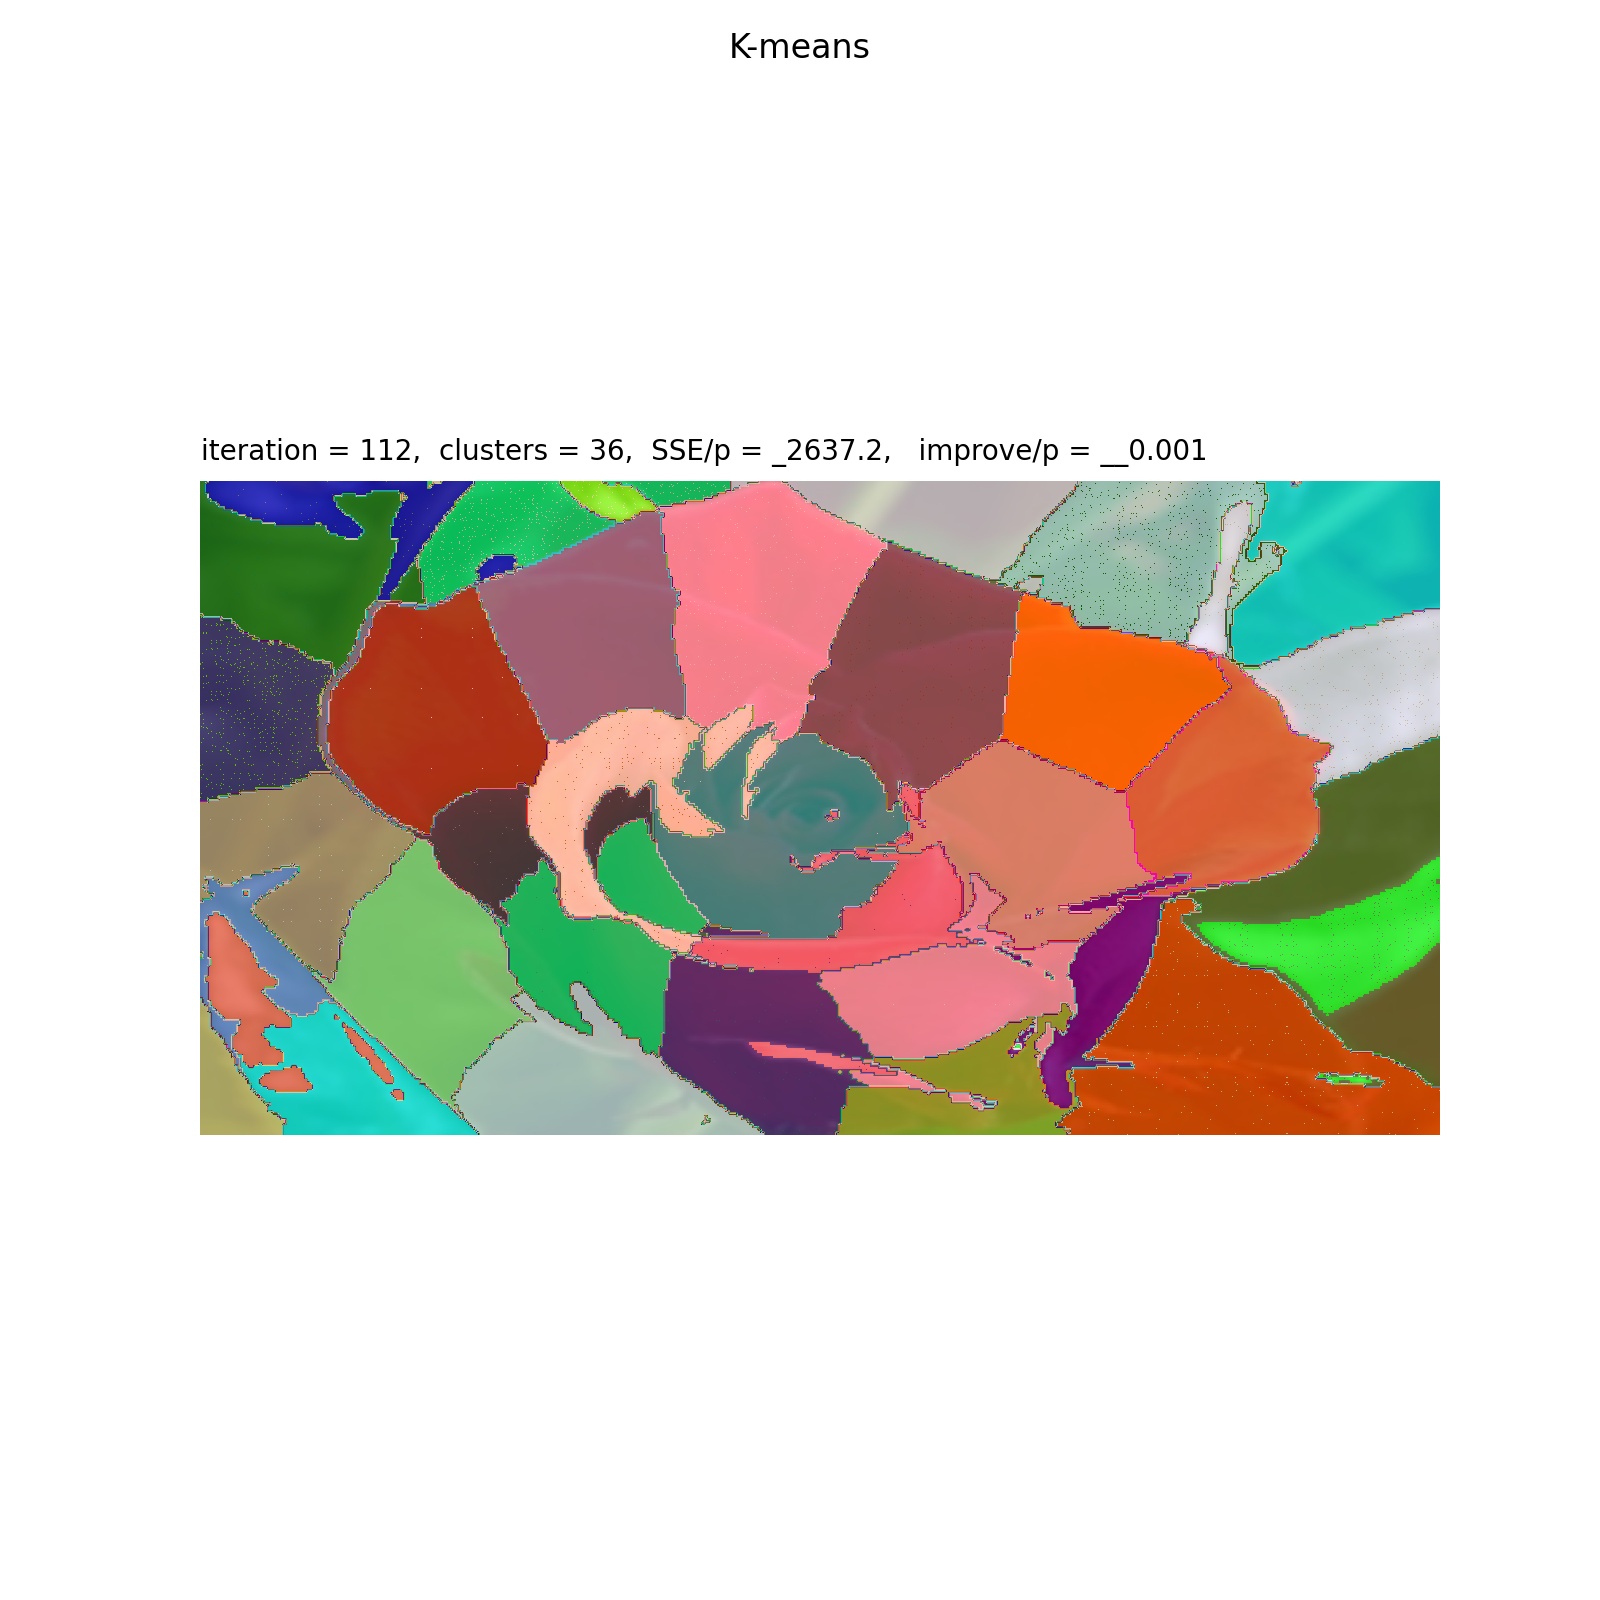

In [7]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=80, weightXY=2.0)
app.run()

### Subprobelm 4.3
### Demonstrate sensitivity of K-means to local minima  (you can use your own images). Show 2-3 different solutions for different random initial means and display the corresponding values of the K-means energy. Add more cells (code and/or text) as necessary. Play wth different weights w and different number of clusters, different images.

/var/folders/p6/wzmppczn3f11rn2xkj_84k780000gn/T/ipykernel_10363/3628407041.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.labels = np.full((num_rows, num_cols), fill_value=self.no_label, dtype=np.int)


<IPython.core.display.Javascript object>


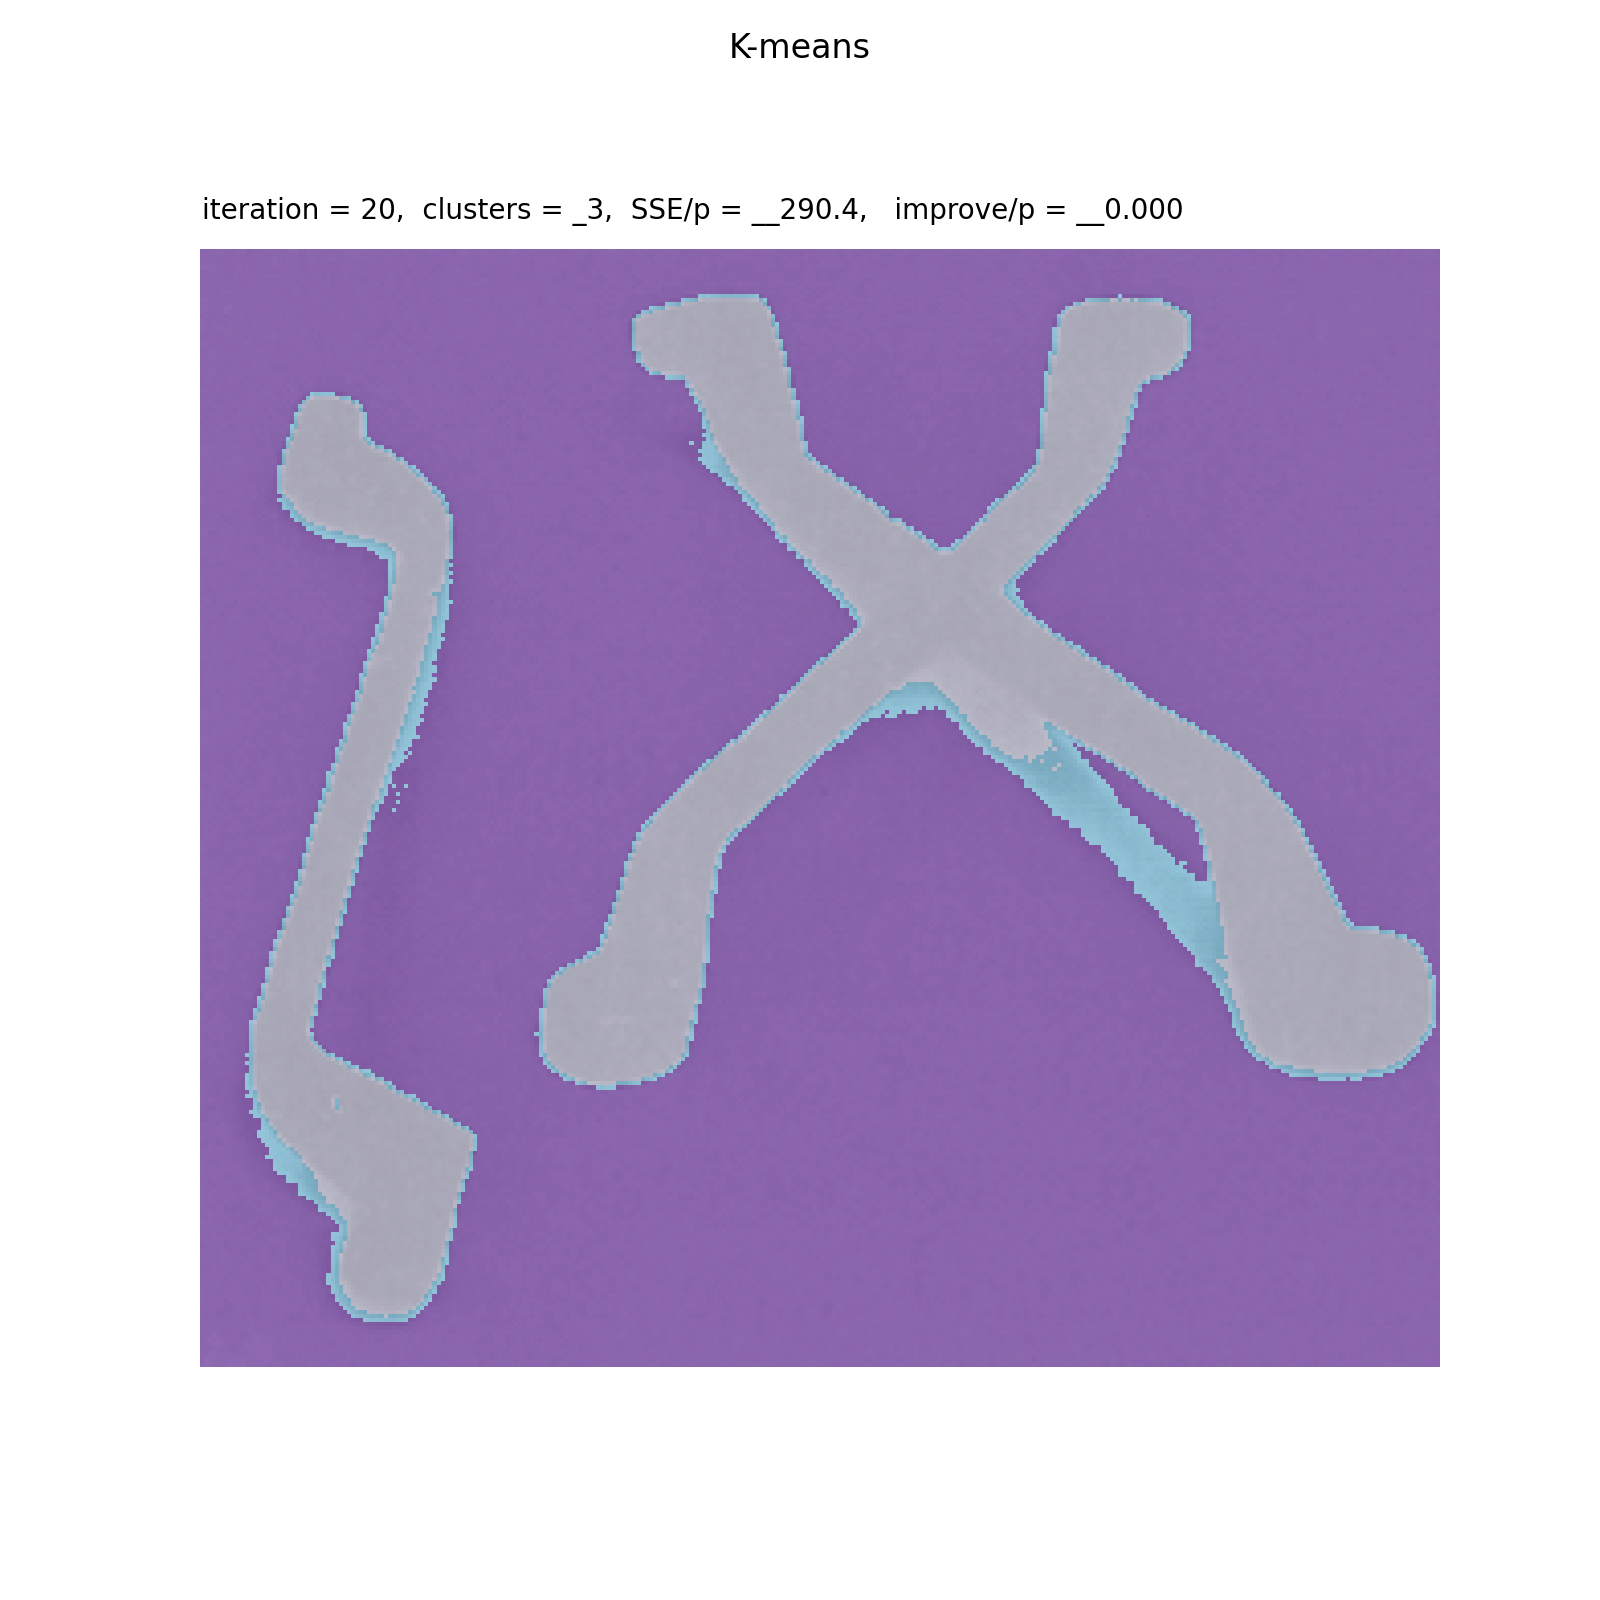

In [8]:
img = plt.imread('images/tools.bmp')
app = MyKmeansApp(img, num_clusters=3, weightXY=0.0)
app.run()